# Assignment
Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.

In [6]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

## Load the Dataset

In [13]:
#Database Credentials:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# Use the connection to extract SQL data
heartdisease_df = pd.read_sql_query('SELECT * FROM heartdisease', con=engine)

# Close the connection
engine.dispose()

## Pre-Processing

In [14]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

## Standardize Values via Scaling

In [15]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## Apply K-Means

In [17]:
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

64.7 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Apply PCA to Plot in 2-D

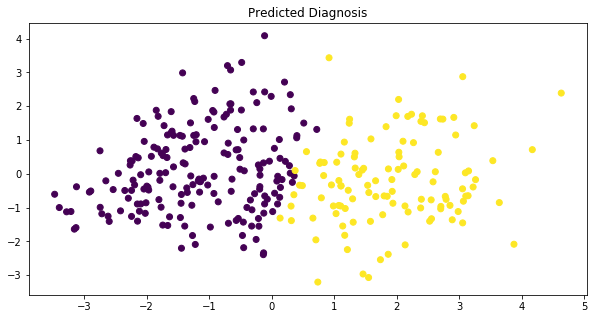

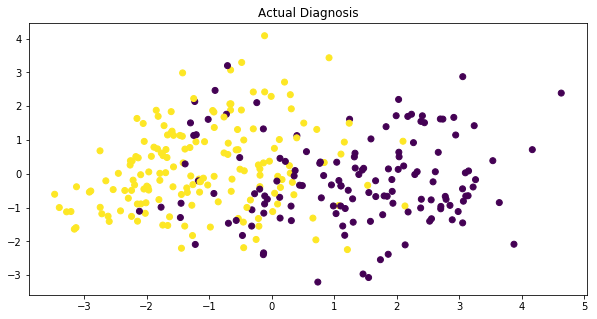

In [25]:
# Plot the solution.
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.title('Predicted Diagnoses')
plt.show()


plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1], c=y)
plt.title('Actual Diagnoses')
plt.show()

## Apply Mini-Batch K-Means

In [20]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

41.6 ms ± 2.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


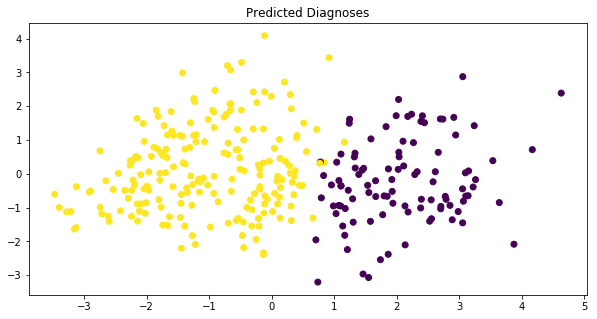

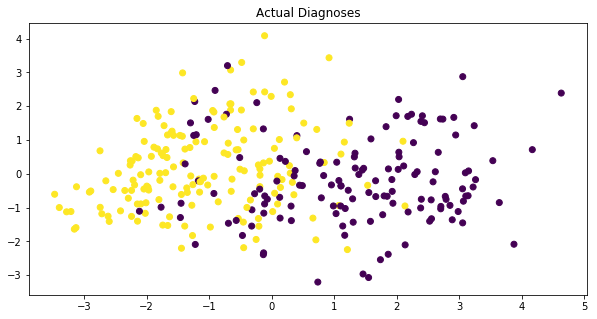

In [27]:
# Plot the solution.
plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1], c=minikmeans_cluster)
plt.title('Predicted Diagnoses')
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1], c=y)
plt.title('Actual Diagnoses')
plt.show()


Both versions of K-Means provides a good separation of the two clusters. However, they don't match directly with the actual diagnoses provided in the target variable, y.